In [172]:
import torch
from torch import nn

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from helper_functions import plot_decision_boundary


In [173]:
N_CLASSES = 8
N_FEATURES = 2
RANDOM_SEED = 42

In [174]:
X, y = make_blobs(
    n_samples=2000,
    n_features=N_FEATURES,
    centers=N_CLASSES,
    cluster_std=1.4,
    random_state=RANDOM_SEED,
)

X.shape, y.shape

((2000, 4), (2000,))

In [175]:
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.LongTensor)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

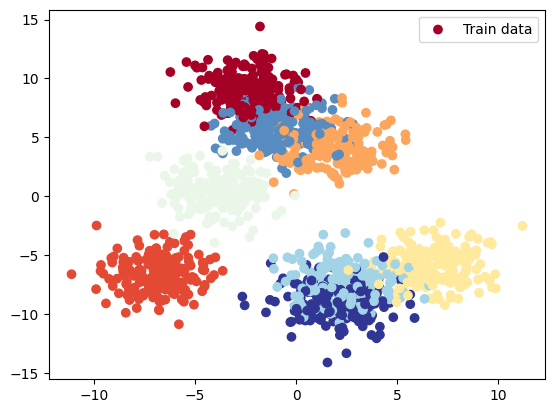

In [177]:
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, label="Train data")
# plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, label="Train data")
plt.legend()

In [178]:
device = 'cpu'

In [179]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, output_features),
        )
    
    def forward(self, x):
        return self.layers(x)

In [180]:
model_0 = BlobModel(
    input_features=2,
    output_features=N_CLASSES,
    hidden_units=8,
).to(device)

In [181]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9)

In [183]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (500x4 and 2x8)

In [ ]:
# y_pred[:2], y_test[:2]
# torch.vstack([y_pred[:5], y_test[:5]])
y_pred

tensor([0, 5, 0, 5, 5, 5, 6, 6, 3, 5, 5, 3, 5, 3, 5, 3, 3, 5, 0, 6, 5, 6, 5, 5,
        5, 6, 5, 3, 5, 0, 5, 3, 3, 6, 5, 6, 5, 5, 5, 5, 0, 0, 5, 3, 0, 0, 3, 3,
        6, 6, 6, 5, 0, 5, 6, 5, 0, 6, 3, 5, 5, 5, 5, 6, 0, 5, 5, 5, 5, 6, 0, 0,
        5, 6, 3, 3, 5, 3, 5, 5, 6, 0, 3, 3, 6, 6, 5, 0, 5, 3, 5, 5, 5, 5, 5, 0,
        3, 0, 5, 5, 6, 0, 5, 3, 5, 0, 5, 5, 5, 3, 6, 5, 5, 1, 6, 0, 6, 0, 0, 3,
        6, 5, 5, 3, 5, 0, 5, 0, 5, 0, 5, 6, 3, 5, 3, 6, 6, 5, 5, 6, 0, 3, 5, 5,
        5, 1, 0, 0, 5, 3, 5, 5, 5, 5, 3, 0, 5, 5, 5, 5, 5, 5, 6, 5, 3, 6, 6, 6,
        5, 0, 3, 5, 5, 5, 5, 0, 0, 0, 6, 5, 0, 5, 3, 5, 5, 6, 5, 5, 0, 0, 5, 5,
        5, 6, 5, 6, 6, 5, 3, 5, 0, 5, 0, 6, 6, 6, 3, 5, 5, 5, 5, 3, 3, 1, 5, 5,
        0, 5, 5, 5, 5, 0, 0, 6, 3, 5, 6, 0, 5, 5, 5, 3, 6, 6, 3, 0, 5, 6, 5, 5,
        1, 6, 3, 5, 5, 5, 6, 5, 3, 6, 3, 6, 0, 5, 0, 6, 6, 5, 0, 5, 5, 5, 6, 5,
        5, 5, 5, 3, 3, 5, 3, 1, 3, 5, 3, 0, 5, 5, 3, 6, 5, 5, 5, 6, 3, 6, 6, 5,
        6, 6, 5, 5, 5, 3, 5, 5, 6, 6, 5,

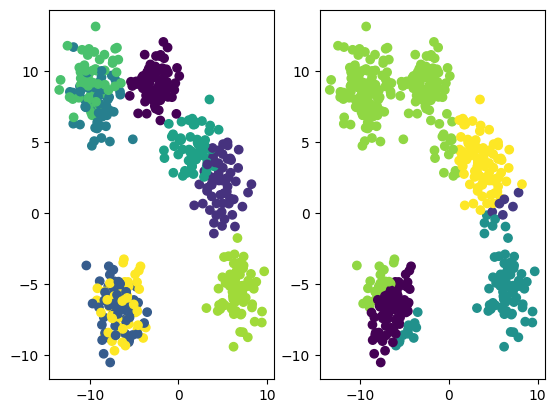

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, label="Test data")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_pred, label="Pred data")
# plt.legend()

In [ ]:
epochs = 10
epoch = 0


In [ ]:
for i in range(epochs):
    epoch += 1

    model_0.train()

    y_logits = model_0(X_train)
    # # y_pred = torch.argmax(torch.softmax(y_logist, dim=1), dim=1)
    y_pred = torch.argmax(y_logits, dim=1)

    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logist = model_0(X_test)
        test_pred = torch.argmax(torch.softmax(test_logist, dim=1), dim=1)

        test_loss = loss_fn(test_logist, y_test)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch}')
            print(f'  Loss: {loss:.3f}, Test loss: {test_loss:.3f}')

Epoch: 10
  Loss: 1.200, Test loss: 1.173


In [ ]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

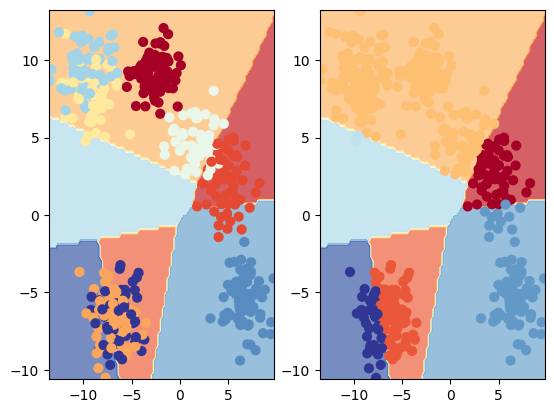

In [ ]:
plt.subplot(1, 2, 1)
plot_decision_boundary(model_0, X_test, y_test)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_pred)